# FLIP (00): Data Science 
**(Module 03: Linear Algebra)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use,but NOT allowed to change and distribute this package.

Prepared by and for 
**Student Members** |
2006-2018 [TULIP Lab](http://www.tulip.org.au), Australia

---

## Session 11 Eigenvalues

# Eigenvalues

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

## Revision

$
\newcommand{\bx}{\boldsymbol{x}}
$

Eigenvalues, $\lambda$ and their corresponding eigenvectors
$\boldsymbol{u}$ are non-zero solutions to the linear system

$$A\boldsymbol{u} = \lambda \boldsymbol{u}.$$

Matrix eigenthings often important: e.g. resonant modes of system, or
defining spectral radius $\varrho(M) = \max | \lambda(M) |$ which
encodes e.g. convergence of iterative schemes for linear systems.

## Eigenvalues

### Eigenvalues and polynomials

Standard definition of eigenvalues: the $n$ roots of the *characteristic
polynomial*

$$\det ( A - \lambda I) = 0.$$

Could compute roots e.g. by nonlinear root finding.

There are two essential problems with this:

1.  Frequently do not need all eigenvalues, but only the largest one(s).
    Computing all, and then sorting, excessively expensive.

2.  Polynomials may be *badly conditioned*: a small change in the
    coefficients leads to a large change in the roots.

A $1\%$ change in the last coefficient leads to massive changes for

$$p(z) = -120 + 274 z - 225 z^2 + 85 z^3 -15 z^4 + z^5;$$

the roots $(4, 5)$ become $(4.580 \pm 0.966 \sqrt{-1})$.

## The power method

Want to compute largest eigenvalue without relying on characteristic
polynomial. Hint from first computer lab:

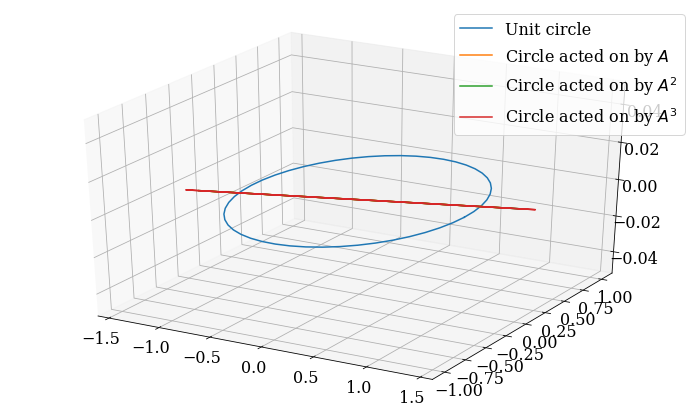

In [3]:
theta = np.linspace(0.0, 2.0*np.pi)
X = np.zeros((5,2,len(theta)))
X[0,0,:] = np.cos(theta)
X[0,1,:] = np.sin(theta)
A = np.random.rand(2,2)
for n in range(4):
    for i in range(len(theta)):
        X[n+1,:,i] = np.dot(A, X[n,:,i])

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[0,0,:], X[0,1,:], np.zeros_like(theta), label='Unit circle')
ax.plot(X[1,0,:], X[1,1,:], np.zeros_like(theta), label=r"Circle acted on by $A$")
ax.plot(X[2,0,:], X[2,1,:], np.zeros_like(theta), label=r"Circle acted on by $A^2$")
ax.plot(X[3,0,:], X[3,1,:], np.zeros_like(theta), label=r"Circle acted on by $A^3$")
ax.legend()
fig.tight_layout()
plt.show()

### The power method: basis vectors

Key to power method: *assumption* that eigenvectors $\{
  {\boldsymbol{u}}_n \}$ form a basis of ${\mathbb C}^n$. If true,
repeated action of $A$ on *generic* vector ${\boldsymbol{x}}$ picks out
eigenvector with largest eigenvalue.

Specifically, construct sequence of vectors $\{ \bx^{(n)}
  \}$. Initial guess $\bx^{(0)}$ (nearly) arbitrary, members of sequence
are

$$\bx^{(k)} = A^k \bx^{(0)}.$$

Writing initial guess in terms of basis of eigenvectors shows

$$\bx^{(0)} = \sum_{j=1}^n a_j {\boldsymbol{u}}_j \, \implies \,
    \bx^{(k)} = \lambda_1^k \left[ a_1 {\boldsymbol{u}}_1 + \left(
        \frac{\lambda_2}{\lambda_1} \right)^{{k}} a_2 {\boldsymbol{u}}_2 + \dots + \left(
        \frac{\lambda_n}{\lambda_1} \right)^{{k}} a_n {\boldsymbol{u}}_n \right].$$

If $| \lambda_j / \lambda_1 | < 1 \quad \forall j > 1$ then the first
term dominates.

### Caveats

Some points have been glossed over:

1.  Have assumed *unique* eigenvalue of maximum modulus.

2.  Have assumed the eigenvectors exist and are linearly independent.
    This is necessary to have a basis of eigenvectors.

3.  Have assumed the initial guess $\bx^{(0)}$ has a nonzero component
    in the direction of eigenvector ${\boldsymbol{u}}_1$; i.e. if

    $$\bx^{(0)} = \sum_{j=1}^n a_j {\boldsymbol{u}}_j \quad \implies \quad a_1 \neq 0.$$

    Not a major problem: repeated numerical operations have floating
    point error, so $a_1$ will never be *precisely* zero. Method
    converges faster the closer that $\bx^{(0)}$ is aligned with
    ${\boldsymbol{u}}_1$.

### Error terms

Can write the iterative method given by the power method as

$$\bx^{(k)} = \lambda_1^k \left( a_1 {\boldsymbol{u}}_1 + \epsilon^{(k)} \right)$$

where the term

$$\epsilon^{(k)} \equiv \sum_{j=2}^n \left(
      \frac{\lambda_j}{\lambda_1} \right)^k a_j {\boldsymbol{u}}_j$$

is expected to vanish in the limit. Explicitly,

$$\| \epsilon^{(k)} \| = {\cal O} \left( \left|
       \frac{\lambda_j}{\lambda_1} \right|^k \right)
   \xrightarrow[k \rightarrow \infty]{} 0.$$

In general expect the “error term” at each step to diminish by
$|\lambda_2 / \lambda_1|$, giving linear convergence, as seen later.

### Algorithm

The simplest (and not fully correct) algorithm defines the ratio

$$r_k = \frac{\| \bx^{(k+1)} \|}{\| \bx^{(k)} \|} = |\lambda_1|
    \frac{\| a_1 {\boldsymbol{u}}_1 + \epsilon^{(k+1)} \|}{\| a_1 {\boldsymbol{u}}_1 +
      \epsilon^{(k)} \|}.$$

From the convergence of the “error term” we then have that

$$\lim_{k\rightarrow\infty} r_k = | \lambda_1 |.$$

Algorithm is impractical: unless $\lambda_1$ is *extremely* close to 1,
iterates diverge to infinity or zero, spoiling accuracy. Instead
redefine members of sequence to have unit norm *after* computing the
ratio $r_k$:

1.  Pick $\bx^{(0)}$ such that $\|\bx^{(0)}\|=1$.

2.  For each $k$ compute $\bx^{(k+1)} = A \bx^{(k)}$.

3.  Compute $r_k = \| \bx^{(k+1)} \|$ (as $\| \bx^{(k)} \| = 1$).

4.  Re-normalize $\bx^{(k+1)}$. Repeat from (2).

### Example

The core of a simple  script for the power method:

    for k = 2 : niterations_max
        xn(:,k-1) = xn(:,k-1)./norm(xn(:,k-1));
        xn(:,k) = A * xn(:, k-1);
        rn(k) = norm(xn(:,k))./norm(xn(:,k-1));
        if (abs(rn(k) - rn(k-1)) < tol)
            break
        end
    end
    lambda = rn(k);

In [4]:
def power_method(A, niterations_max = 50, tol = 1e-15):
    xn = np.zeros((len(A), niterations_max+1))
    xn[:, 0] = np.ones((len(A),)) + 1e-7*np.random.rand(len(A))
    rn = np.ones((niterations_max+1,))
    for k in range(niterations_max):
        xn[:,k] = xn[:,k] / np.linalg.norm(xn[:,k])
        xn[:,k+1] = np.dot(A, xn[:,k])
        rn[k+1] = np.linalg.norm(xn[:,k+1])
        if (abs(rn[k+1]-rn[k]) < tol): 
            break
    if k < niterations_max:
        rn[k+2:] = rn[k+1] # This ensures the later values are set to something sensible.
    return (rn[k+1], rn)

In [5]:
lamda, v = np.linalg.eig(A)
lamda_power, lamda_seq = power_method(A)
print("The maximum eigenvalue from the power method is {} (exact is {}, error is {})".format(lamda_power, np.max(lamda), 
                                                                                             abs(lamda_power - np.max(lamda))))

The maximum eigenvalue from the power method is 1.076054127344509 (exact is 1.0760541273445092, error is 2.220446049250313e-16)


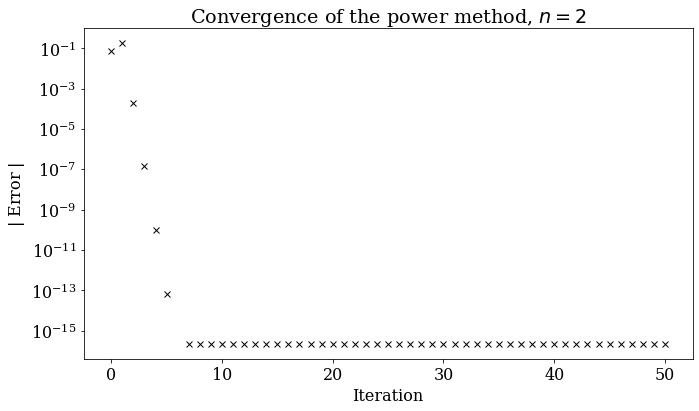

In [6]:
errors = np.abs(lamda_seq - np.max(lamda))
iterations = range(len(errors))

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.semilogy(iterations, errors, 'kx')
ax.set_xlabel('Iteration')
ax.set_ylabel(r"$\|$ Error $\|$")
ax.set_title(r"Convergence of the power method, $n=2$")
fig.tight_layout()
plt.show()

In [9]:
B = np.random.rand(10,10)
lamda, v = np.linalg.eig(B)
lamda_power, lamda_seq = power_method(B)
print("The maximum eigenvalue from the power method is {} (exact is {}, error is {})".format(lamda_power, np.max(lamda), 
                                                                                             abs(lamda_power - np.max(lamda))))

The maximum eigenvalue from the power method is 4.81926456915435 (exact is (4.819264569154344+0j), error is 6.217248937900877e-15)


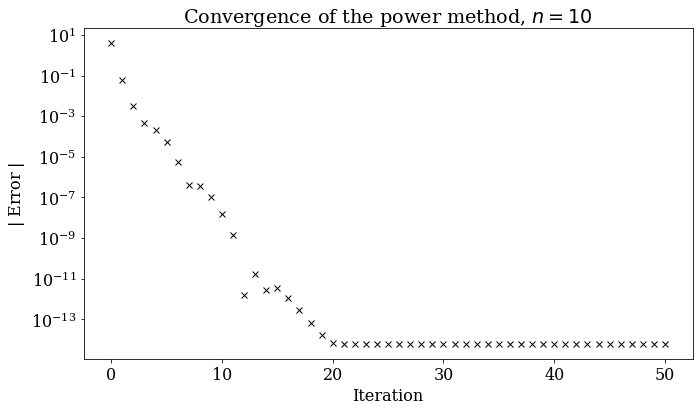

In [10]:
errors = np.abs(lamda_seq - np.max(lamda))
iterations = range(len(errors))

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.semilogy(iterations, errors, 'kx')
ax.set_xlabel('Iteration')
ax.set_ylabel(r"$\|$ Error $\|$")
ax.set_title(r"Convergence of the power method, $n=10$")
fig.tight_layout()
plt.show()

## Phase information

### Beyond the absolute value

Although $\max |\lambda|$ useful, straightforward to modify power method
to compute actual full value.

The eigenvalue is complex (in general), so in computing just the
*modulus* have lost information about the *phase*. Phase information
lost when norms are computed. So replace the norms with a different
*linear* functional $\phi: {\mathbb C}^n
  \rightarrow {\mathbb R}$.

Then have

$$r_k = \frac{\phi(\bx^{(k+1)})}{\phi(\bx^{(k)})} = \lambda_1
    \frac{ a_1 \phi({\boldsymbol{u}}_1) + \phi(\epsilon^{(k+1)})}{ a_1 \phi( {\boldsymbol{u}}_1) +
      \phi(\epsilon^{(k)})};$$

depends on the linearity of $\phi$. In the limit get full eigenvalue
$\lambda_1$.

One possible choice for $\phi$ is to simply sum the components of $\bx$.
In all cases care must be taken to avoid dividing by zero.

### Example

Apply the power method to the matrix

$$A =
        \begin{pmatrix}
          1 & 2 & 3 \\
          4 & 5 & 6 \\
          7 & 8 & 0
        \end{pmatrix}.$$

The result converges linearly to find $\lambda = 12.1229$.

Identical convergence is seen for $-A$.

In [11]:
def full_power_method(A, niterations_max=50, tol=1e-15):
    xn = np.zeros((len(A), niterations_max+1))
    xn[:, 0] = np.ones((len(A),)) + 1e-7*np.random.rand(len(A))
    rn = np.ones((niterations_max+1,))
    for k in range(niterations_max):
        xn[:,k] = xn[:,k] / np.linalg.norm(xn[:,k])
        xn[:,k+1] = np.dot(A, xn[:,k])
        rn[k+1] = np.sum(xn[:,k+1])/np.sum(xn[:,k])
        if (abs(rn[k+1]-rn[k]) < tol):
            break
    if k < niterations_max:
        rn[k+2:] = rn[k+1] # This ensures the later values are set to something sensible.
    return (rn[k+1], rn)

In [12]:
A = np.array([[1.0,2.0,3.0],[4.0,5.0,6.0],[7.0,8.0,0.0]])
lamda, v = np.linalg.eig(A)
lamda_power, lamda_seq = full_power_method(A)
print("The maximum eigenvalue from the power method is {} (exact is {}, error is {})".format(lamda_power, np.max(lamda), 
                                                                                             abs(lamda_power - np.max(lamda))))
lamda, v = np.linalg.eig(-A)
lamda_power, lamda_seq = full_power_method(-A)
print("For -A, maximum eigenvalue from the power method is {} (exact is {}, error is {})".format(lamda_power, np.min(lamda), 
                                                                                             abs(lamda_power - np.min(lamda))))

The maximum eigenvalue from the power method is 12.122893784632394 (exact is 12.122893784632401, error is 7.105427357601002e-15)
For -A, maximum eigenvalue from the power method is -12.122893784632394 (exact is -12.122893784632401, error is 7.105427357601002e-15)


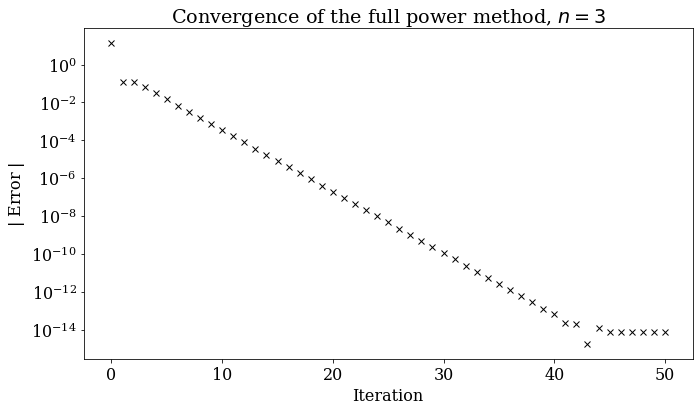

In [13]:
errors = np.abs(lamda_seq - np.min(lamda))
iterations = range(len(errors))

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.semilogy(iterations, errors, 'kx')
ax.set_xlabel('Iteration')
ax.set_ylabel(r"$\|$ Error $\|$")
ax.set_title(r"Convergence of the full power method, $n=3$")
fig.tight_layout()
plt.show()

## Convergence

### Rate of convergence

Look at behaviour near solution using Taylor’s theorem.

Start by defining $\mu = \lambda_2 / \lambda_1$. Use as “small
parameter” in expansion. Note that

$$\left| \frac{\lambda_j}{\lambda_1} \right|  < |\mu| \quad \forall
    j > 2.$$

Rewrite ratio as

$$r_k =  \lambda_1
    \frac{ a_1 \phi({\boldsymbol{u}}_1) + \phi(\epsilon^{(k+1)})}{ a_1
      \phi( {\boldsymbol{u}}_1) + \phi(\epsilon^{(k)})} = \lambda_1 \left[
      1 - \phi (\epsilon^{(k)}) \right] + {\cal O} (\mu^{k+1}).$$

The relative error is then

$$E^{(k)} = \left| \frac{r_k - \lambda_1}{\lambda_1} \right|    
    = \left| \phi( \epsilon^{(k)} ) \right|  + {\cal O}
    (\mu^{k+1}) 
    = c_k \mu^k.$$

Hence we have a linear decrease at each stage of a factor $\mu$.

### Example revisited

The matrix

$$A =
        \begin{pmatrix}
          1 & 2 & 3 \\
          4 & 5 & 6 \\
          7 & 8 & 0
        \end{pmatrix}$$

has eigenvalues

$$\left\{
          \begin{array}{c}
            12.1229\\ -5.7345\\ -0.3884
          \end{array}\right. .$$

Therefore the slope of the line should be $\log(|\mu|) \simeq -0.748593$; the actual best fit line used (carefully excluding endpoints!) had slope $-0.748590$.

In [14]:
lamda_sorted = np.sort(np.abs(lamda))
slope = np.log(lamda_sorted[-2]/lamda_sorted[-1])

p = np.polyfit(iterations[5:35], np.log(errors[5:35]), 1)

print("Expected slope is {}; measured slope is {}.".format(slope, p[0]))

Expected slope is -0.7485934166733926; measured slope is -0.7485900102126531.


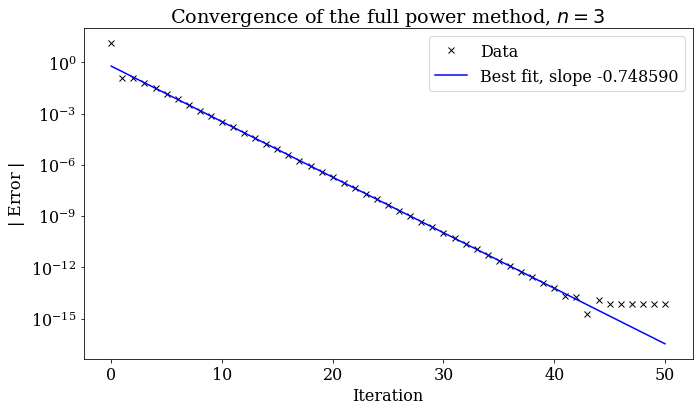

In [15]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.semilogy(iterations, errors, 'kx', label = 'Data')
ax.semilogy(iterations, np.exp(np.array(iterations)*p[0]+p[1]), 'b-', label = r"Best fit, slope {:2f}".format(p[0]))
ax.set_xlabel('Iteration')
ax.set_ylabel(r"$\|$ Error $\|$")
ax.set_title(r"Convergence of the full power method, $n=3$")
ax.legend()
fig.tight_layout()
plt.show()

## Summary

-   Eigenvalues of matrices contain fundamental information: we will
    frequently want or need to compute them. The eigenvalues of largest
    magnitude are frequently important for, e.g. the spectral radius.

-   Computing the eigenvalues from the characteristic polynomial may be
    numerically ill-conditioned.

-   The power method is an iterative scheme for finding the largest
    eigenvalue. It assumes that

    1.  There is a single largest eigenvalue;

    2.  The eigenvectors are linearly independent.

-   The power method converges linearly.

-   The power method works when there are repeated eigenvalues; the
    eigenvector cannot be found, however. With distinct “largest”
    eigenvalues it may fail.